In [72]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
# https://www.youtube.com/watch?v=FmpDIaiMIeA&feature=youtu.be
# https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from matplotlib import pyplot as plt

In [47]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening

classifier.add(Flatten())
# Step 4 - Full connection
# hidden layer
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [74]:
type(training_set)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [49]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 10,
                         validation_data = test_set)

Epoch 1/10
50/50 [==============================] - 71s 1s/step - loss: 0.6952 - acc: 0.5019 - val_loss: 0.6914 - val_acc: 0.5150
Epoch 2/10
50/50 [==============================] - 45s 892ms/step - loss: 0.6911 - acc: 0.5369 - val_loss: 0.6863 - val_acc: 0.5480
Epoch 3/10
50/50 [==============================] - 38s 752ms/step - loss: 0.6899 - acc: 0.5337 - val_loss: 0.6867 - val_acc: 0.5090
Epoch 4/10
50/50 [==============================] - 35s 690ms/step - loss: 0.6835 - acc: 0.5512 - val_loss: 0.6804 - val_acc: 0.5705
Epoch 5/10
50/50 [==============================] - 43s 858ms/step - loss: 0.6835 - acc: 0.5481 - val_loss: 0.6812 - val_acc: 0.5780
Epoch 6/10
50/50 [==============================] - 22s 437ms/step - loss: 0.6656 - acc: 0.5975 - val_loss: 0.6732 - val_acc: 0.5735
Epoch 7/10
50/50 [==============================] - 22s 440ms/step - loss: 0.6596 - acc: 0.6100 - val_loss: 0.6534 - val_acc: 0.6385
Epoch 8/10
50/50 [==============================] - 22s 450ms/step - los

In [58]:
# saving the model
classifier.save('bade_cnn.h5')

In [44]:
# joblib_file = "CNN_Model.pkl"  
# joblib.dump(classifier, joblib_file)

In [8]:
history.history['val_loss']

[0.6846236794713944,
 0.687663575959584,
 0.639914746322329,
 0.6235775919187636,
 0.5975397361649407,
 0.6261303826930031,
 0.6041927337646484,
 0.6198641407111335,
 0.5756175044983153,
 0.7004209037811037]

In [65]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


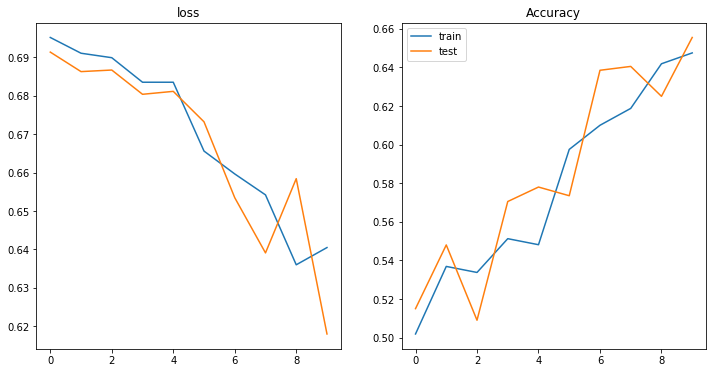

In [71]:
# plot history
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,6))
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')
ax2.plot(history.history['acc'], label='train')
ax2.plot(history.history['val_acc'], label='test')
ax1.set_title('loss')
ax2.set_title('Accuracy')

plt.legend()
plt.show()

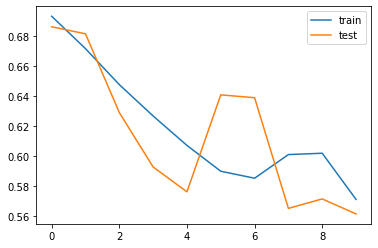

In [35]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

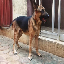

In [52]:
# loading an image from the disk
test_image = image.load_img('dog_pic.jpg', target_size = (64, 64))
test_image

In [53]:
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

{'cats': 0, 'dogs': 1}
dog


In [54]:
test_image1 = image.load_img('tree_pic.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

{'cats': 0, 'dogs': 1}
dog


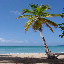

In [55]:
test_image1

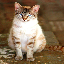

In [56]:
test_image2

In [57]:
test_image2 = image.load_img('cat_pic.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image2)
test_image = np.expand_dims(test_image, axis = 0)
result1 = classifier.predict(test_image)
print(training_set.class_indices)
# our cut-off
if result1[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

{'cats': 0, 'dogs': 1}
cat
